<a href="https://colab.research.google.com/github/vargopal/stockMarket/blob/F455--Quant-Finance/regressionClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from numpy.random import default_rng
import matplotlib.pyplot as plt
import numpy as np


In [79]:
rng = default_rng()
N = 100
x = rng.uniform(high =10, size = (N,1))
ε = rng.normal(0, 7, size=(N,1))
y = 2 - 100*x + ε

In [58]:
import statsmodels.api as sm

In [59]:
X = sm.add_constant(x)
X[:5]
# Still confused as to why we create the array and use it in the OLS 
# Does it have to do with the weighting for y

array([[1.        , 2.94279156],
       [1.        , 5.14007812],
       [1.        , 2.33930366],
       [1.        , 8.75040193],
       [1.        , 5.97454906]])

In [60]:
model = sm.OLS(y,X)
results = model.fit()

In [61]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.203e+05
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          4.54e-166
Time:                        13:54:42   Log-Likelihood:                -324.21
No. Observations:                 100   AIC:                             652.4
Df Residuals:                      98   BIC:                             657.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9599      1.212      2.442      0.0

In [62]:
model_2 = sm.OLS(y,x)
results_2 = model.fit()

In [63]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.203e+05
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          4.54e-166
Time:                        13:54:47   Log-Likelihood:                -324.21
No. Observations:                 100   AIC:                             652.4
Df Residuals:                      98   BIC:                             657.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9599      1.212      2.442      0.0

Results 2 looks better due to a higher absolute value t-score and higher R-squared

In [16]:
results.params,results.bse, results.tvalues, results.pvalues

(array([ 2.25006151, -3.21306049]),
 array([1.39446419, 0.22687479]),
 array([  1.61356708, -14.16226327]),
 array([1.09836933e-01, 1.91579434e-25]))

In [18]:
results.resid
sum(results.resid)

2.1671553440683056e-13

In [19]:
import scipy.stats as scs
scs.skew(results.resid)

-0.24898612136624354

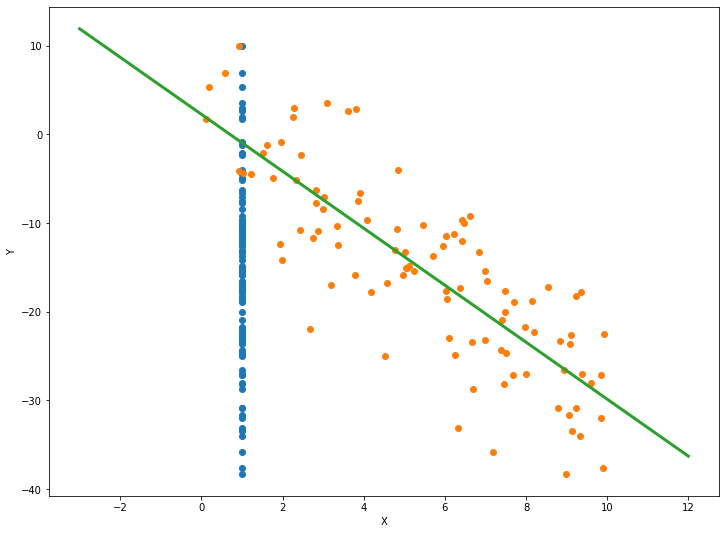

In [23]:
fig, ax = plt.subplots(figsize=(12,9))

ax.plot(x, y, 'o')

# calculate predicted values
xvals = np.arange(-3,13)
y_hat = results.predict(sm.add_constant(xvals))

ax.plot(xvals, y_hat, lw=3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

sklearn part of the module

In [64]:
from sklearn.linear_model import LinearRegression

In [77]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [76]:
lin_reg.intercept_ 

array([2.95990617])

In [75]:
lin_reg.coef_

array([[-100.01155978]])

In [83]:
lin_reg.score(x,y)

-2.5733042847181244

Non linear model